# Mobile Price Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv("/content/train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
print(train_df.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [ ]:
print(f"Missing values:\n{train_df.isnull().sum()}")

Missing values:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [ ]:
# Remove duplicates
duplicates = train_df.duplicated().sum()
print(f"Duplicates before removal: {duplicates}")
train_df = train_df.drop_duplicates()
print("Duplicates after removal:", train_df.duplicated().sum())

Duplicates before removal: 0
Duplicates after removal: 0


In [ ]:
# Extract screen area if width and height exist
if 'px_width' in train_df.columns and 'px_height' in train_df.columns:
    train_df['screen_area'] = train_df['px_width'] * train_df['px_height']
    print("Feature 'screen_area' extracted.")

Feature 'screen_area' extracted.


In [ ]:
if 'price_range' in train_df.columns:
    X = train_df.drop('price_range', axis=1)
    y = train_df['price_range']

    # Select top 10 features
    selector = SelectKBest(score_func=f_classif, k=10)
    X_new = selector.fit_transform(X, y)

    selected_features = X.columns[selector.get_support()]
    print(f"Top 10 selected features: {selected_features}")

Top 10 selected features: Index(['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'screen_area'],
      dtype='object')


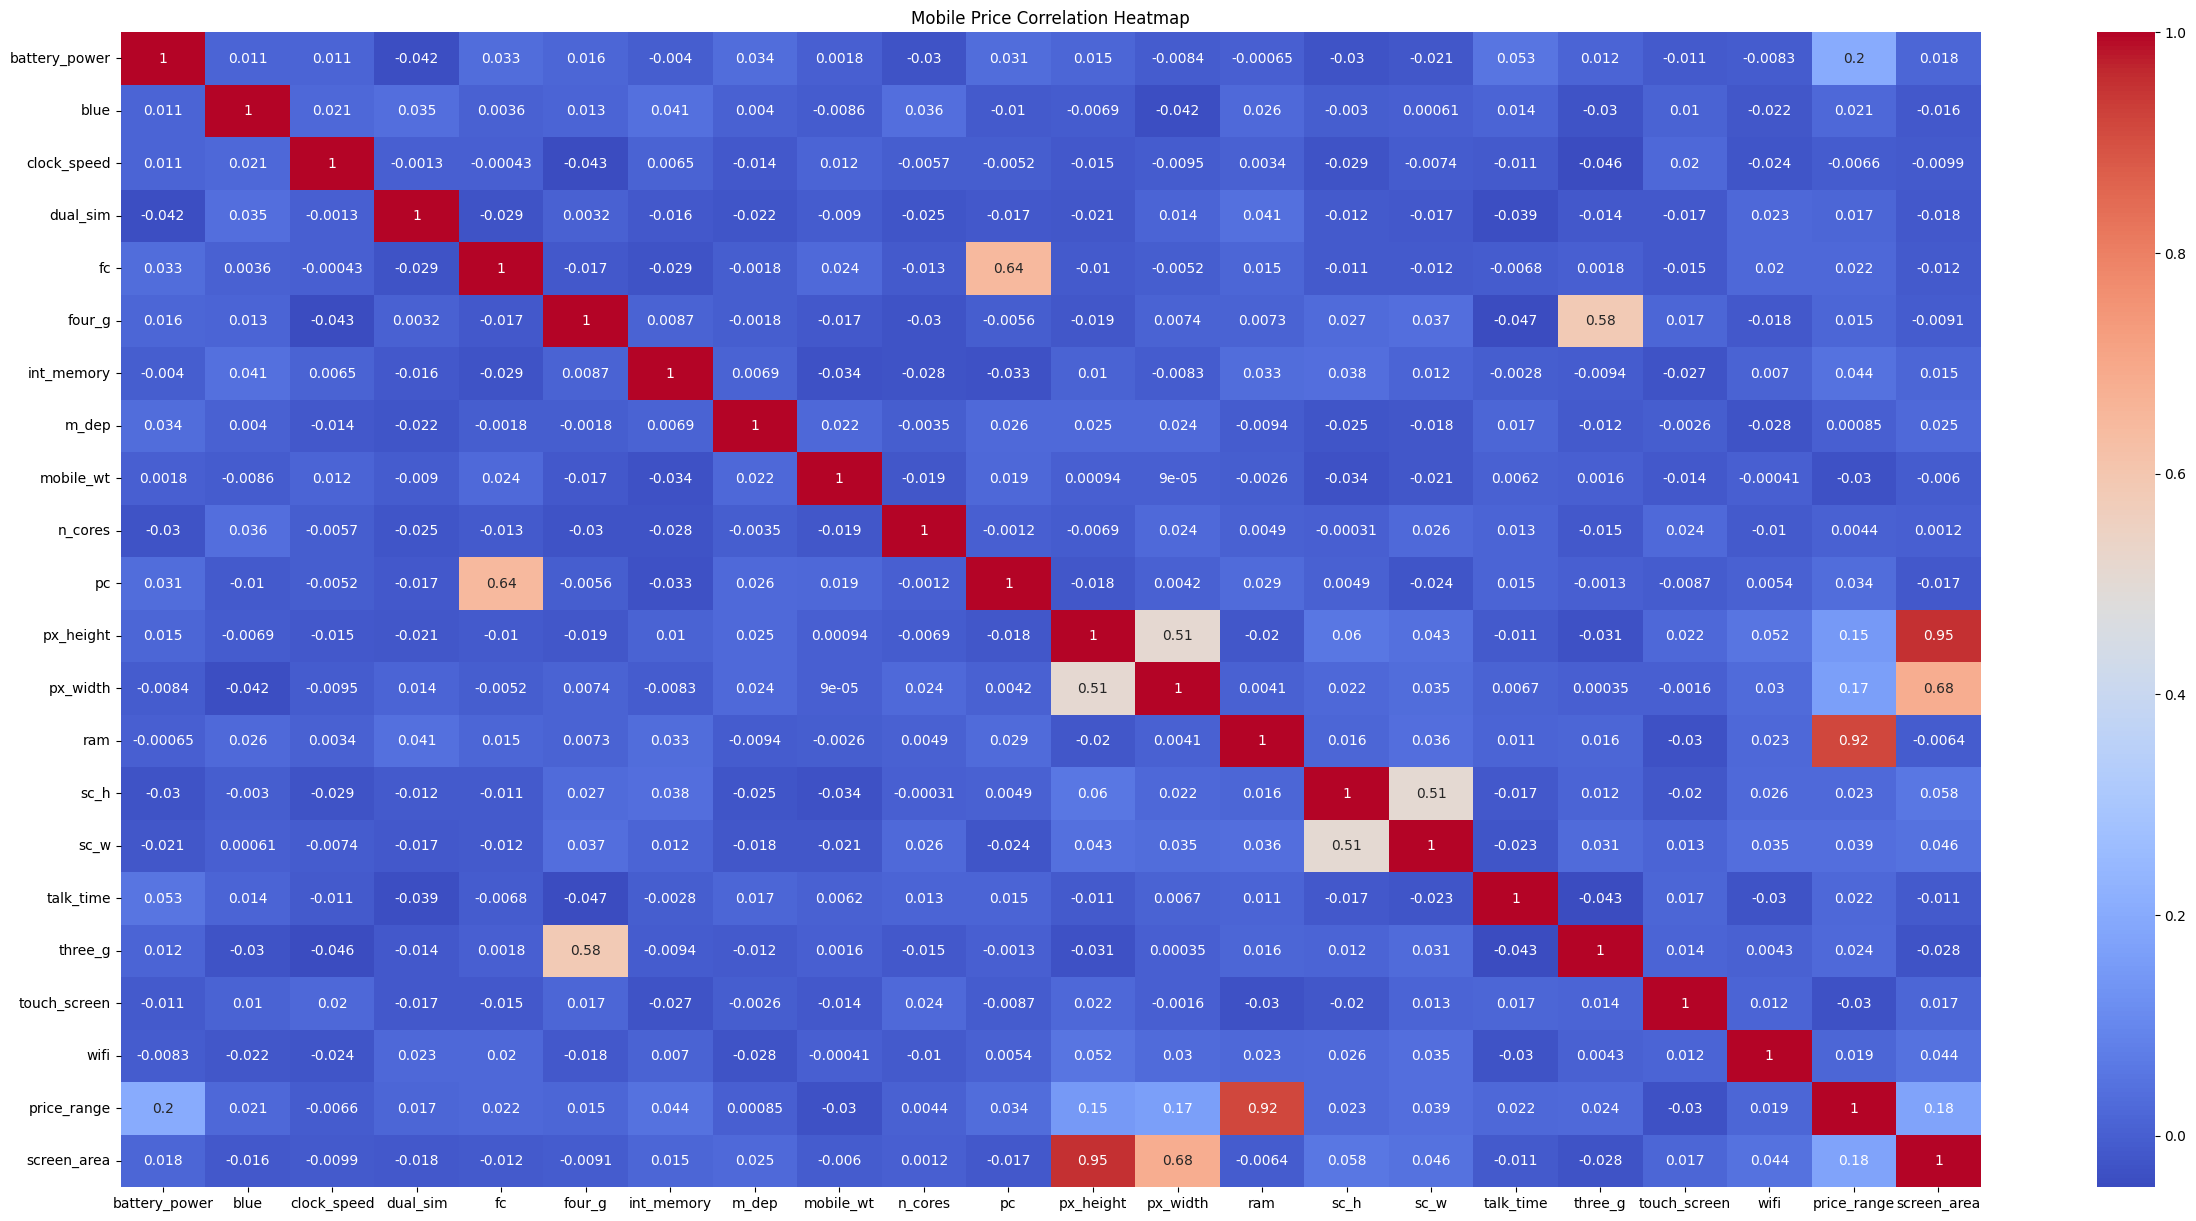

In [ ]:
# Correlation heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Mobile Price Correlation Heatmap")
plt.show()

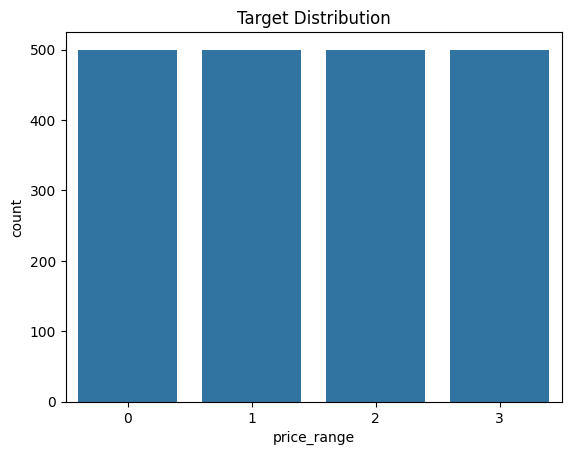

In [ ]:
# Target distribution
if 'price_range' in train_df.columns:
    sns.countplot(x='price_range', data=train_df)
    plt.title("Target Distribution")
    plt.show()

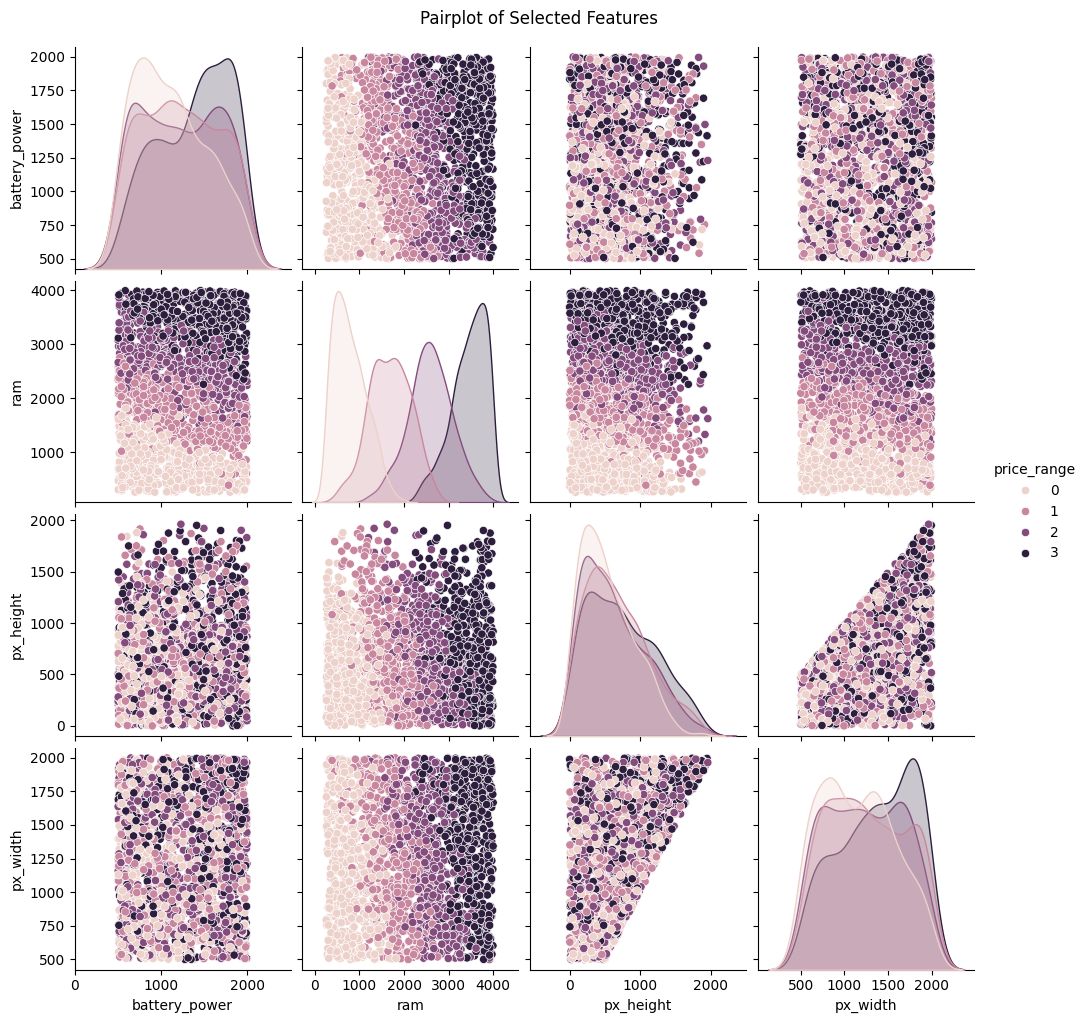

In [ ]:
selected_features = ['battery_power', 'ram', 'px_height', 'px_width', 'price_range']
sns.pairplot(train_df[selected_features], hue='price_range')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()